In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
text_color = 'black'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Calibri'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

from adjustText import adjust_text
from highlight_text import ax_text,fig_text

In [3]:
df1 = pd.read_csv('../passing.csv', index_col='Rk')
df2 = pd.read_csv('../possession.csv', index_col='Rk')

In [4]:
df_pos = pd.read_excel('../Player Positions-FBRef format.xlsx')

In [5]:
df_pass = pd.merge(df1, df_pos, on="Player")
df_carry = pd.merge(df2, df_pos, on="Player")

pos = ['Central Midfield', 'Defensive Midfield']

# FILTERING ONLY CMS AND DMS
df_pass = df_pass[df_pass['Position'].apply(lambda x: x in pos)]
df_carry = df_carry[df_carry['Position'].apply(lambda x: x in pos)]

df_pass = df_pass[(df_pass['90s']>=3)]
df_carry = df_carry[(df_carry['90s']>=3)]

df_pass = df_pass.drop_duplicates()
df_carry = df_carry.drop_duplicates()

In [6]:
df = pd.DataFrame(columns=['Player', '90s', 'Position', 'Touches', 'Prog Passes', 'Prog Carries'])

In [7]:
df['Player'] = df_pass['Player']
df['90s'] = df_pass['90s']
df['Position'] = df_pass['Position']
df['Touches'] = df_carry['Touches']
df['Prog Passes'] = df_pass['Prog']
df['Prog Carries'] = df_carry['Prog']

In [8]:
df['Prog Actions/100 Touches'] = (df['Prog Carries'] + df['Prog Passes'])*100/df['Touches']

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
90s,469.0,18.076972,9.028728,3.000000,10.300000,18.100000,25.000000,38.000000
Touches,469.0,1135.991471,657.768839,125.000000,584.000000,1082.000000,1592.000000,3167.000000
Prog Passes,469.0,73.496802,52.103883,3.000000,31.000000,64.000000,102.000000,289.000000
Prog Carries,469.0,74.904051,54.170211,0.000000,32.000000,63.000000,108.000000,335.000000
Prog Actions/100 Touches,469.0,12.640498,3.386414,2.272727,10.135135,12.379808,14.796133,27.099912


Text(0.122, 0.867, 'khatri_shreyas')

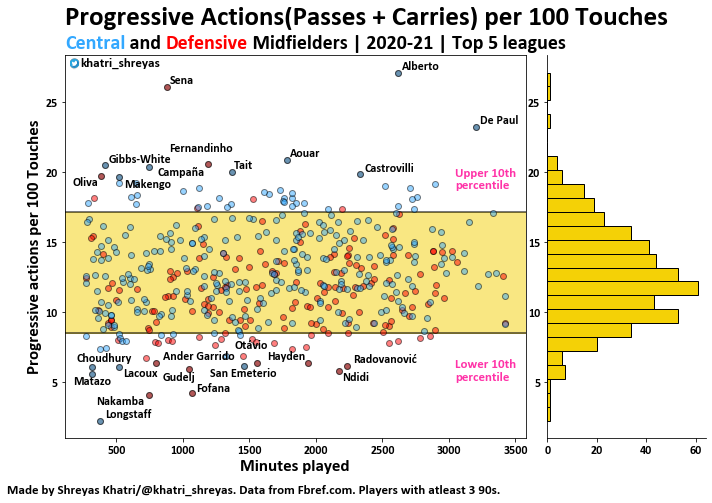

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.axis('off')

ax = fig.add_axes([0.1,0.13,0.64,0.76])
q1 = df['Prog Actions/100 Touches'].quantile(0.1)
q3 = df['Prog Actions/100 Touches'].quantile(0.9)
ax.axhspan(q1,q3,color='#F4D106',alpha=0.5, zorder=0)
ax.axhline(q1,c='black',zorder=0,alpha=0.7)
ax.axhline(q3,c='black',zorder=0,alpha=0.7)

x = df[df['Position']=='Defensive Midfield']['90s']*90
y = df[df['Position']=='Defensive Midfield']['Prog Actions/100 Touches']
ax.scatter(x, y, alpha=.5, c='red',edgecolor='black')

x = df[df['Position']=='Central Midfield']['90s']*90
y = df[df['Position']=='Central Midfield']['Prog Actions/100 Touches']
ax.scatter(x, y, alpha=.5, c='#33A8FF',edgecolor='black')

q1 = df['Prog Actions/100 Touches'].quantile(0.25)
q3 = df['Prog Actions/100 Touches'].quantile(0.75)
outlier_top_lim = q3 +  (q3 - q1)
outlier_bottom_lim = q1 -  0.75*(q3 - q1)

# LABELLING OUTLIERS
texts = []
for prog, minutes, s in zip(df['Prog Actions/100 Touches'], df['90s'], df['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    if prog > outlier_top_lim or prog < outlier_bottom_lim:
        ax.scatter(minutes*90, prog, alpha=0.3, c='black')
        texts.append(ax.text(minutes*90, prog, name,
                              fontdict=dict(color='black', size=12)))

adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1.2, 1.2), expand_text=(1, 1),
            arrowprops=dict(arrowstyle = '-', lw=0.1, alpha = 0))

# LABELS
ax.set_xlabel('Minutes played', size=17, weight='bold')
ax.set_ylabel('Progressive actions per 100 Touches',size=17, weight='bold')

ax.text(3050, q3+4, 'Upper 10th\npercentile', size=13, c='#FF33A8')
ax.text(3050, q1-5, 'Lower 10th\npercentile', size=13, c='#FF33A8')


# HISTOGRAM
ax = fig.add_axes([0.77,0.13,0.22,0.76])
ax.hist(df['Prog Actions/100 Touches'], bins=25, edgecolor='black', color='#F4D106',orientation='horizontal');
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

fig.text(0.1,0.95,'Progressive Actions(Passes + Carries) per 100 Touches', size = 27, weight='heavy')
fig_text(0.1,0.93,'<Central> and <Defensive> Midfielders'+' | 2020-21 | Top 5 leagues', size = 20,
        highlight_textprops=[{'color':'#33A8FF'},{'color':'red'}])
fig.text(0.02,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com. Players with atleast 3 90s.', size=13)

# TWITTER
ax2 = fig.add_axes([0.10,0.86,0.025,0.025])
ax2.axis('off')
img = plt.imread('twitter.png')
ax2.imshow(img)
fig.text(0.122,0.867,'khatri_shreyas', size=13, weight='bold')

#plt.savefig('Prog_Touch', facecolor='white', dpi=300)